In [0]:
import numpy as np
import pandas as pd
from tensorflow.keras.losses import kullback_leibler_divergence , mse
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dense, Dropout, Input, LeakyReLU, Flatten, Reshape
from tensorflow.keras.models import Model,Sequential

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = (x_train / 255.0).astype(np.float32)
x_test = (x_test / 255.0).astype(np.float32)
latent_size = 32
# Create Encoder
def getEncoder(latent_size):
  model = Sequential([
      Dense(units=128, input_dim=(784)),
      LeakyReLU(0.2),
      Dense(units=64),
      LeakyReLU(0.2),
      Dense(units=latent_size, activity_regularizer=tf.keras.regularizers.l1(10e-5))
  ])
  model.compile(loss='binary_crossentropy', optimizer='adam')  
  return model

# Create Decoder
def getDecoder(latent_size):
  model = Sequential([
      Dense(units=latent_size, activity_regularizer=tf.keras.regularizers.l1(10e-5)),
      LeakyReLU(0.2),
      Dense(units=64),
      LeakyReLU(0.2),
      Dense(units=128, input_dim=(784)),
      ])
  model.compile(loss='binary_crossentropy', optimizer='adam')
  return model
  

                      
  # Write your code for Decoder here
  return 

In [23]:

%tensorflow_version 2.x
import tensorflow
print(tensorflow.__version__)
from tensorflow.keras.losses import kullback_leibler_divergence,mse

TensorFlow is already loaded. Please restart the runtime to change versions.
1.15.0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dense, Dropout, Input, LeakyReLU, Flatten, Reshape
from tensorflow.keras.models import Model,Sequential

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = (x_train / 255.0).astype(np.float32)
x_test = (x_test / 255.0).astype(np.float32)

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

latent_size = 100
# Create Encoder
def getEncoder(latent_size):
  model = Sequential([
      Conv2D(1, (3, 3), activation='sigmoid', padding='same'),
      LeakyReLU(0.2),
      Conv2D(32, (3, 3), padding='same'),
      MaxPooling2D((2,2)),
      LeakyReLU(0.2),
      Conv2D(64, (3, 3), padding='same'),
      LeakyReLU(0.2),
      Conv2D(64, (3, 3), padding='same'),
      MaxPooling2D((2,2)),
      Flatten(),
      Dense(units=7*7*64),
      LeakyReLU(0.2),
      #Dense(units=100, input_dim=latent_size),
      Dense(units=100, input_dim=latent_size, activity_regularizer=tf.keras.regularizers.l1(10e-5)),
  ])
  model.compile(loss='binary_crossentropy', optimizer='adam')
  return model
  # Write your code for encoder here

# Create Decoder
def getDecoder(latent_size):
    model = Sequential([
        #Dense(units=100, input_dim=latent_size),
        Dense(units=100, input_dim=latent_size, activity_regularizer=tf.keras.regularizers.l1(10e-5)),
        LeakyReLU(0.2),
        Dense(units=7*7*64),
        Reshape((7, 7, 64), input_shape=(7*7*64,)),
        UpSampling2D((2, 2)),
        Conv2D(64, (3, 3), padding='same'),
        LeakyReLU(0.2),
        Conv2D(64, (3, 3), padding='same'),
        LeakyReLU(0.2),
        UpSampling2D((2, 2)),
        Conv2D(32, (3, 3), padding='same'),
        LeakyReLU(0.2),
        Conv2D(1, (3, 3), activation='sigmoid', padding='same'),
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam')
  
    return model

In [0]:
# Merge encoder and decoder into the single model
def createVAE(encoder, decoder):
    VAE_input = Input(shape=(28,28, 1)) # Set shape to (28, 28, 1) if autoutiencoder is convolonal, (784, 1) otherwise
    hidden = encoder(VAE_input)
    VAE_output= decoder(hidden)
    VAE = Model(inputs=VAE_input, outputs=VAE_output)
    VAE.compile(loss=[mse], optimizer='adam')
    
    return VAE

encoder = getEncoder(latent_size)
decoder = getDecoder(latent_size)
autoencoder = createVAE(encoder, decoder)

In [35]:
# Train
autoencoder.fit(x_train, x_train, batch_size=64, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 27s 444us/sample - loss: 0.0182
Epoch 2/10
60000/60000 [==============================] - 26s 426us/sample - loss: 0.0055
Epoch 3/10
60000/60000 [==============================] - 25s 424us/sample - loss: 0.0044
Epoch 4/10
60000/60000 [==============================] - 26s 426us/sample - loss: 0.0038
Epoch 5/10
60000/60000 [==============================] - 26s 426us/sample - loss: 0.0035
Epoch 6/10
60000/60000 [==============================] - 25s 424us/sample - loss: 0.0033
Epoch 7/10
60000/60000 [==============================] - 26s 425us/sample - loss: 0.0030
Epoch 8/10
60000/60000 [==============================] - 26s 426us/sample - loss: 0.0029
Epoch 9/10
60000/60000 [==============================] - 26s 427us/sample - loss: 0.0027
Epoch 10/10
60000/60000 [==============================] - 26s 425us/sample - loss: 0.0026


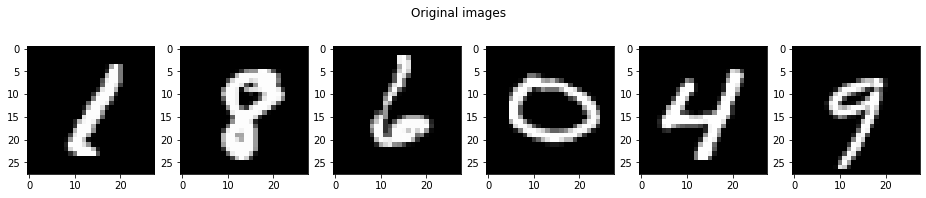

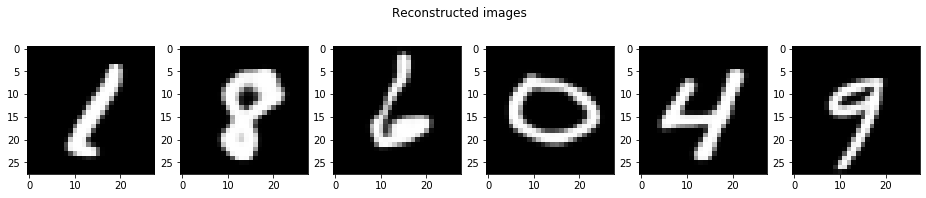

In [36]:
from matplotlib import pyplot as plt

def plot_images(images, title):
  fig=plt.figure(figsize=(16, 3))
  columns = images.shape[0]
  rows = 1
  for i in range(columns):
    img = np.random.randint(10, size=(10, 10))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(images[i], cmap='gray')
  fig.suptitle(title)
  plt.show()  

N_images = 6
samples = x_test[np.random.choice(x_test.shape[0], N_images)]
reconstructed = autoencoder.predict(samples)
plot_images(samples.reshape(-1, 28, 28), title='Original images')
plot_images(reconstructed.reshape(-1, 28, 28), title='Reconstructed images')

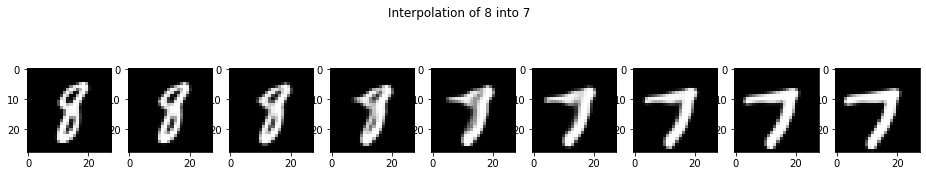

In [53]:
def interpolation(vec1, vec2, N_inter):
  intermediate_values = np.zeros((0, vec1.shape[0]))
  for i in range(N_inter):
    intermediate = (1-float(i / N_inter))*vec1 + float(i / N_inter)*vec2
    intermediate_values = np.append(intermediate_values, intermediate.reshape(1, -1), axis=0)
  intermediate_values = np.append(intermediate_values, vec2.reshape(1, -1), axis=0)
  return intermediate_values

N_inter = 8
# Take 2 random images from the test set
choice = np.random.choice(x_test.shape[0], 2)
samples = x_test[choice]
encodings = encoder.predict(samples)

vectors = interpolation(encodings[0], encodings[1], N_inter)
images = decoder.predict(vectors)
plot_images(images.reshape(-1, 28, 28), "Interpolation of %i into %i"%(y_test[choice[0]], y_test[choice[1]]))

In [0]:
import cv2

N_inter = 90
resize_coeff = 10
# Take 2 random images from the test set
choice = np.random.choice(x_test.shape[0], 2)
samples = x_test[choice]
encodings = encoder.predict(samples)

vectors = interpolation(encodings[0], encodings[1], N_inter)
images = decoder.predict(vectors)

size = (images.shape[2]*10, images.shape[1]*10)
out = cv2.VideoWriter('interpolation.avi',cv2.VideoWriter_fourcc(*'DIVX'), 30, size, 0)

for i in range(len(images)):
    img = images[i] / np.max(images[i])
    img = (cv2.resize(255*img.reshape(28, 28), size, cv2.INTER_NEAREST))
    out.write(img.astype(np.uint8))
out.release()

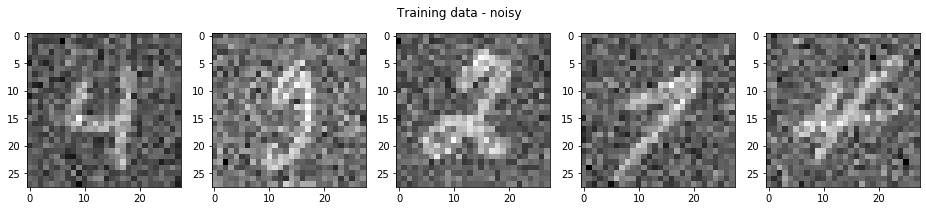

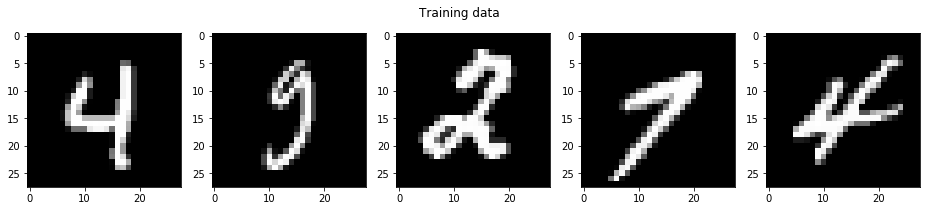

In [19]:
noise_factor = 0.3

# Add some noise to images
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
choice = np.random.choice(x_test.shape[0], 5)

# Plot noisy and original images
samples = x_train_noisy[choice]
plot_images(samples.reshape(-1, 28, 28), "Training data - noisy")
plot_images(x_train[choice].reshape(-1, 28, 28), "Training data")

In [0]:
# Training
autoencoder.fit(x_train_noisy, x_train, batch_size=64, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 166us/sample - loss: 0.0071
Epoch 2/10
60000/60000 [==============================] - 9s 158us/sample - loss: 0.0062
Epoch 3/10
60000/60000 [==============================] - 9s 157us/sample - loss: 0.0059
Epoch 4/10
60000/60000 [==============================] - 10s 161us/sample - loss: 0.0057
Epoch 5/10
60000/60000 [==============================] - 9s 157us/sample - loss: 0.0055
Epoch 6/10
60000/60000 [==============================] - 9s 157us/sample - loss: 0.0054
Epoch 7/10
60000/60000 [==============================] - 9s 157us/sample - loss: 0.0053
Epoch 8/10
60000/60000 [==============================] - 9s 158us/sample - loss: 0.0052
Epoch 9/10
60000/60000 [==============================] - 9s 157us/sample - loss: 0.0051
Epoch 10/10
60000/60000 [==============================] - 9s 157us/sample - loss: 0.0050


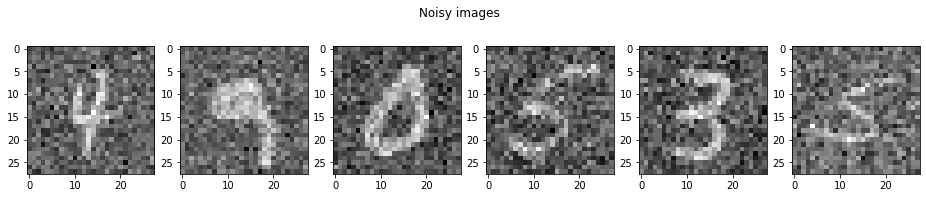

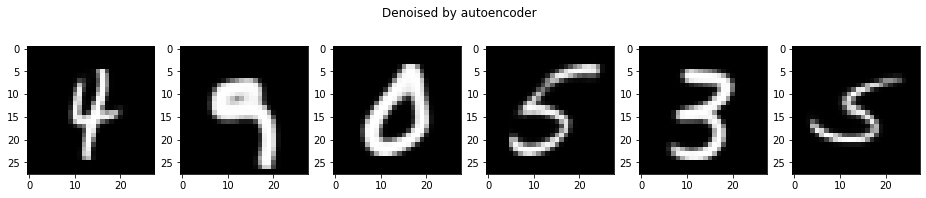

In [0]:
N_images = 6
# Select several images from test dataset
samples = x_test_noisy[np.random.choice(x_test_noisy.shape[0], N_images)]
reconstructed = autoencoder.predict(samples)
# Plot inputs and denoised outputs
plot_images(samples.reshape(-1, 28, 28), title='Noisy images')
plot_images(reconstructed.reshape(-1, 28, 28), title='Denoised by autoencoder')